In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [5]:
iris= sns.load_dataset("iris")

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.sample()

,sepal_length,sepal_width,petal_length,petal_width,species
91,6.1,3.0,4.6,1.4,versicolor


In [9]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [13]:
#encoding
label_encoder = preprocessing.LabelEncoder()
iris["species"] = label_encoder.fit_transform(iris["species"])

In [14]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
x = iris.iloc[:,0:4]
y = iris["species"]

In [17]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [18]:
iris["species"].unique()

array([0, 1, 2])

In [20]:
iris["species"].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [22]:
colnames= list(iris.columns)
colnames

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.2,random_state = 10)

In [24]:
y_train

58     1
97     1
129    2
114    2
146    2
      ..
113    2
64     1
15     0
125    2
9      0
Name: species, Length: 120, dtype: int32

In [25]:
#Building Decision Tree Classifier using Gini Criteria

In [28]:
model = DecisionTreeClassifier(criterion = 'gini',min_samples_split = 5)
model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_split=5)

[Text(0.3181818181818182, 0.9166666666666666, 'petal length (cm) <= 2.45\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]\nclass = virginica'),
 Text(0.22727272727272727, 0.75, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.4090909090909091, 0.75, 'petal length (cm) <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]\nclass = virginica'),
 Text(0.18181818181818182, 0.5833333333333334, 'petal width (cm) <= 1.65\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]\nclass = versicolor'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = versicolor'),
 Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.6363636363636364, 0.5833333333333334, 'petal width (cm) <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]\nclass = virginica'),
 Text(0.45454545454545453, 0.4166666666666667, 'petal length (cm) <= 5.35\ngini = 0.49\nsamples = 7\nvalue = [0,

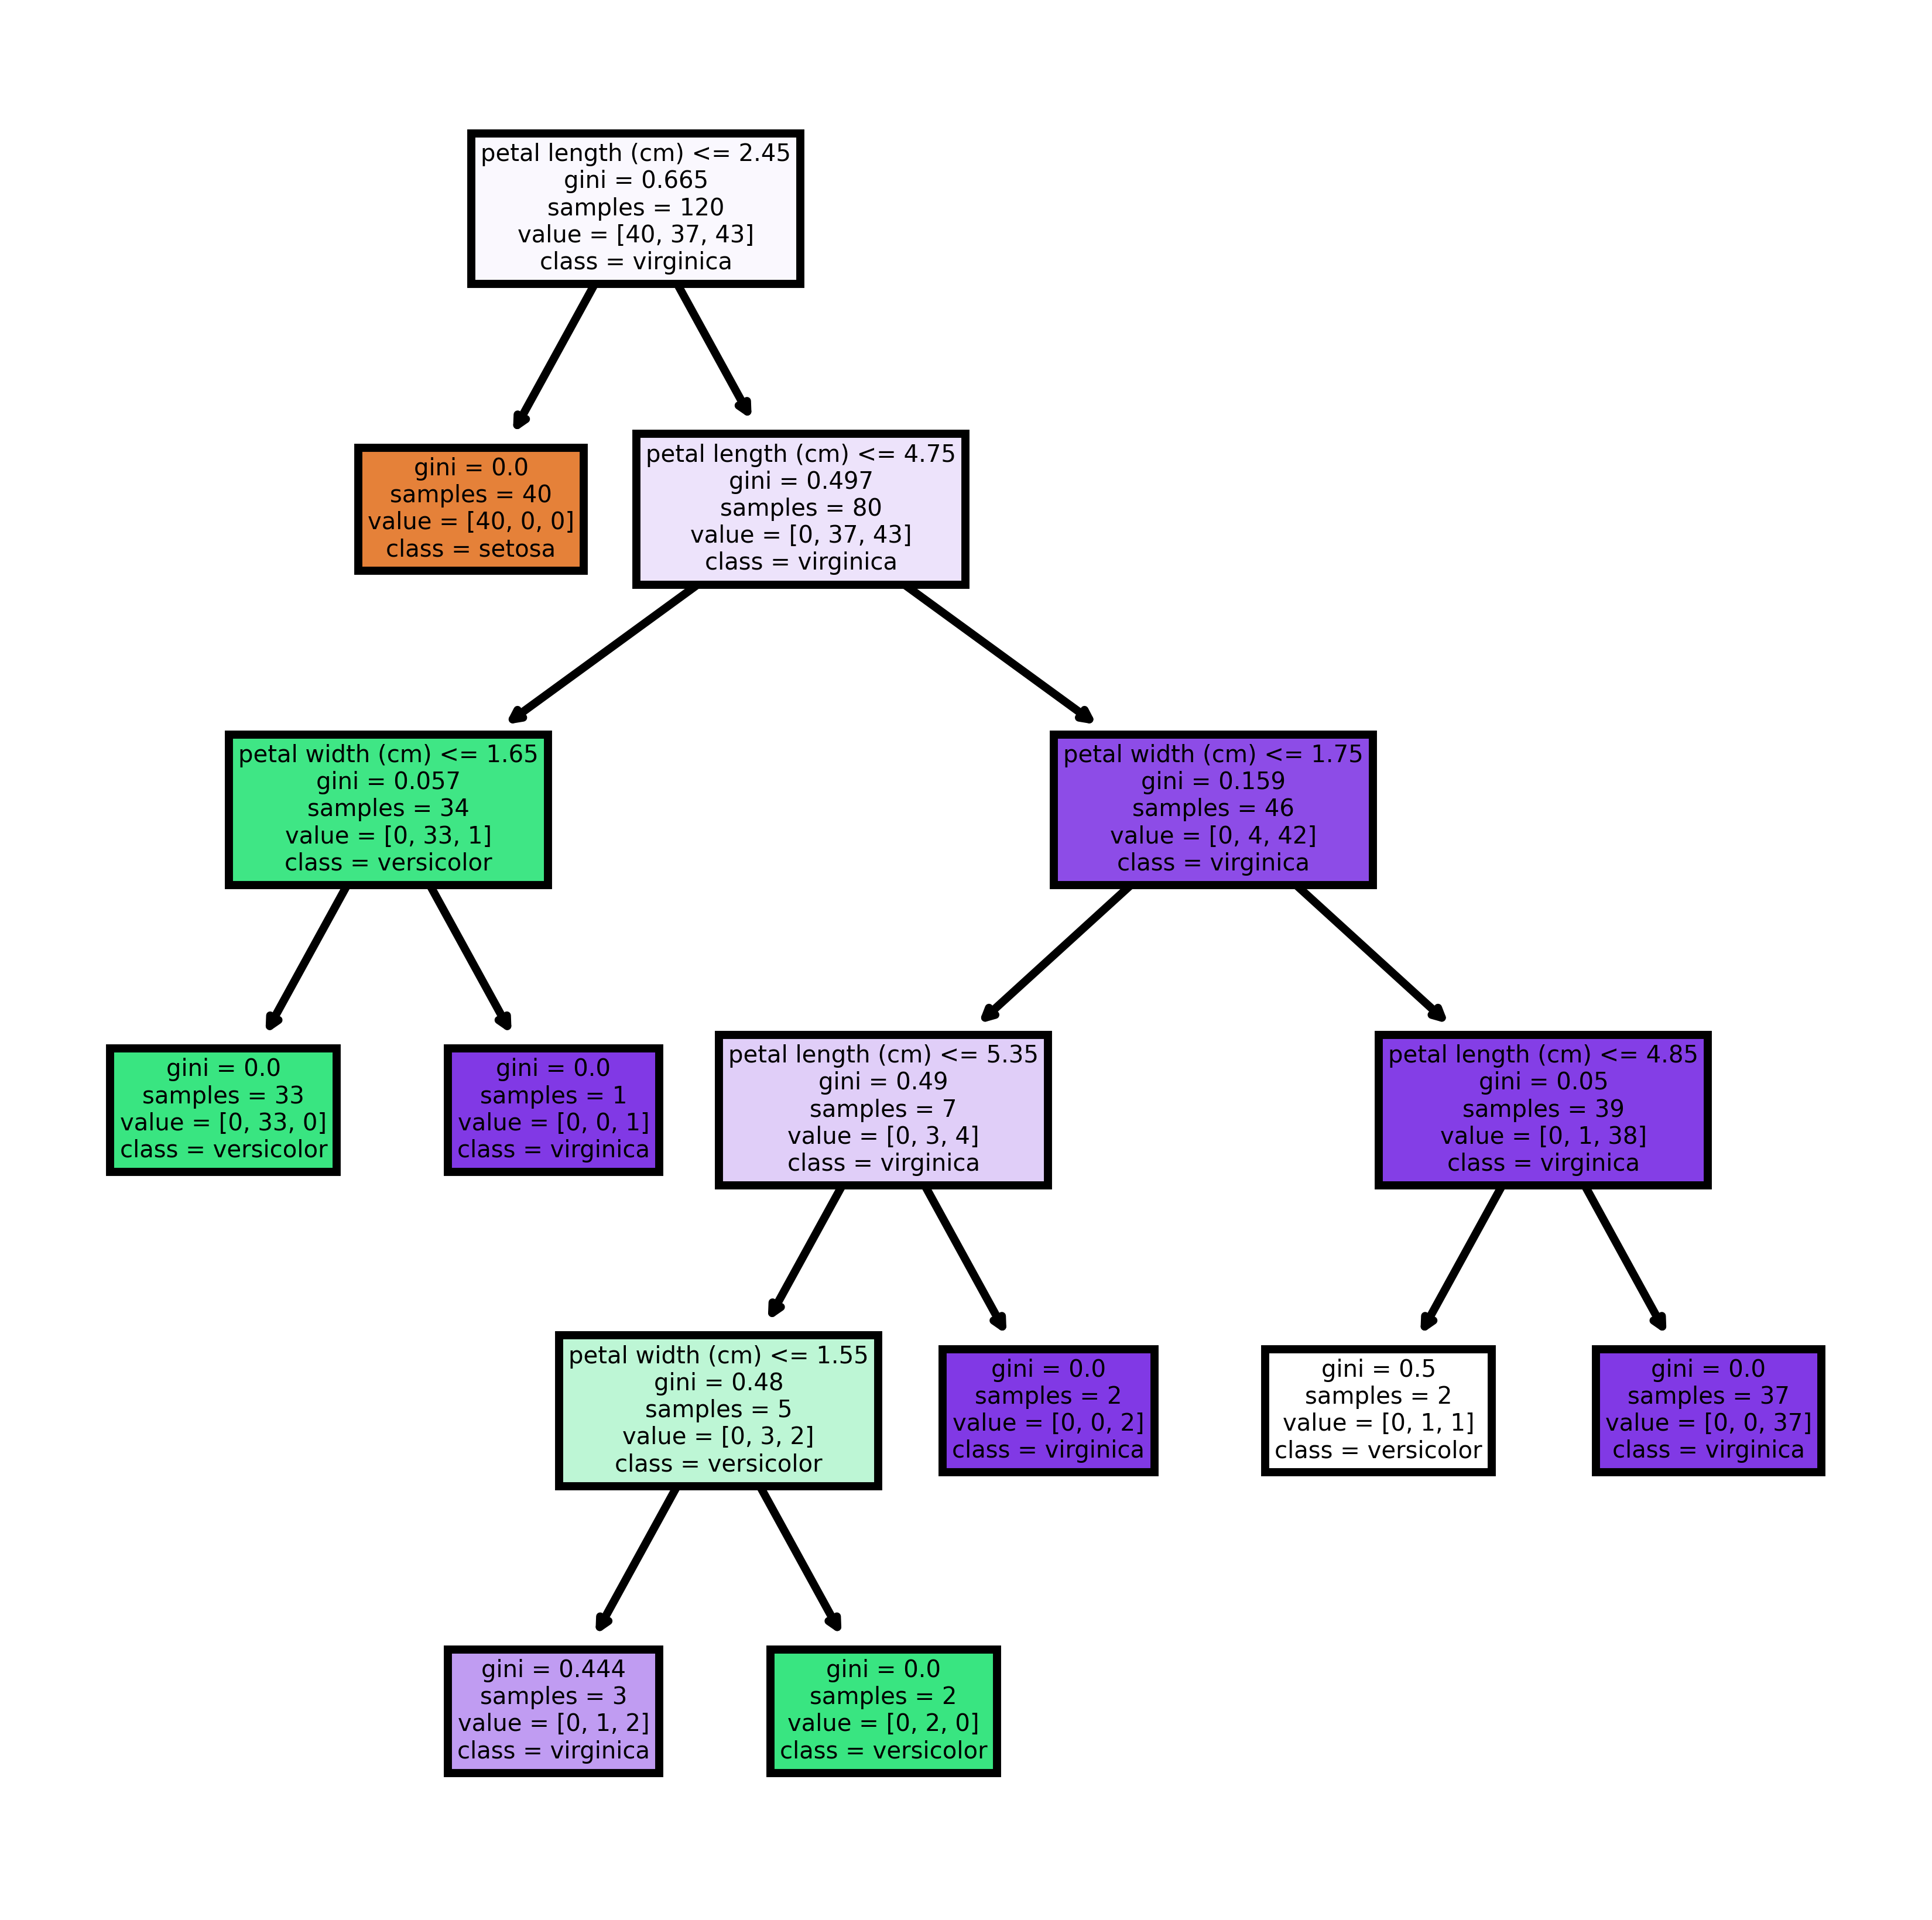

In [30]:
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)', 'petal width (cm)']
cn = ['setosa','versicolor','virginica']
fig,axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4),dpi = 1000)
tree.plot_tree(model,feature_names = fn,class_names = cn,filled = True)

In [33]:
#prediction of the test data
preds= model.predict(x_test) #predicting the test data
pd.Series(preds).value_counts()

1    12
0    10
2     8
dtype: int64

In [34]:
from sklearn import metrics

In [35]:
metrics.accuracy_score(preds,y_test)

0.9

In [36]:
#Building Decision Tree Classifier(CART) using entropycriteria

In [37]:
#gini = 1-p1^2 -p2^2-p3^2
#entropy = -p1log(p1) - p2log(p2) - p3log(p3)

In [38]:
model = DecisionTreeClassifier(criterion = 'entropy',min_samples_split = 5)

In [39]:
y_train

58     1
97     1
129    2
114    2
146    2
      ..
113    2
64     1
15     0
125    2
9      0
Name: species, Length: 120, dtype: int32

In [40]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=5)

In [41]:
preds = model.predict(x_test)

In [42]:
metrics.accuracy_score(preds,y_test)

1.0